## Ridge Model Template

In [1]:
# first import group (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [59]:
# Ridge group
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.model_selection import FeatureImportances

In [3]:
df=pd.read_csv('Advertising.csv')

**1-EDA part**

In [4]:
#Looking up the data
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


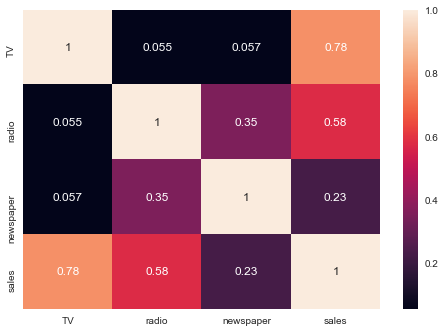

In [6]:
sns.heatmap(df.corr(), annot=True)

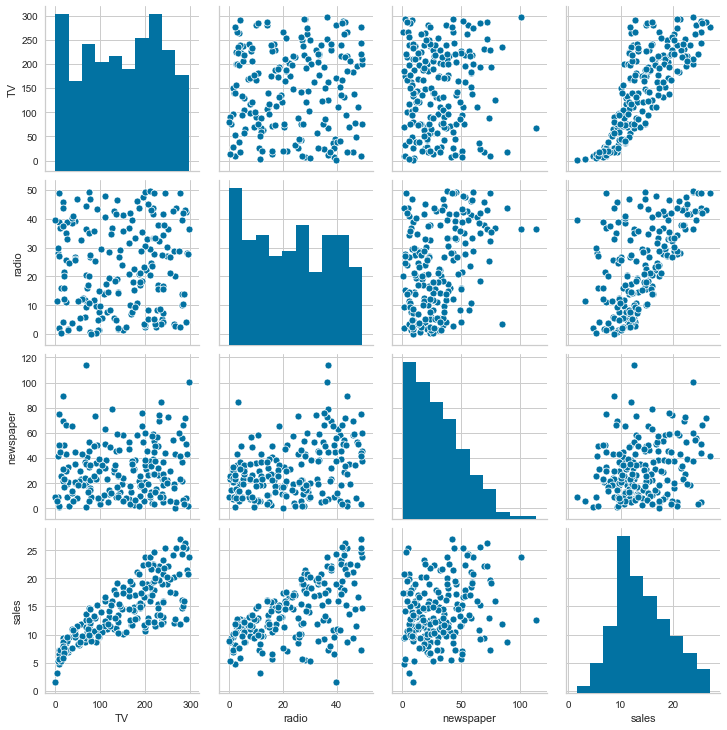

In [7]:
sns.pairplot(df)

**2-Split to train**

In [8]:
X=df.drop(['sales'], axis=1)

In [9]:
y=df.sales

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

**3-Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X_train = scaler.transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [24]:
transformed_df = pd.DataFrame(X_train, columns=X.columns)

In [25]:
transformed_df.head()

,TV,radio,newspaper
0,0.509013,0.367347,-0.548869
1,-0.679061,-0.849950,0.348534
2,-1.226231,0.186048,-0.430925
3,-1.282471,-1.251399,-0.774502
4,-1.576561,-1.465073,-0.169396


**4-Creating Ridge Regression**

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridge_model = Ridge()

**5-Training Ridge Regression**

In [28]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

**6-Model Evaluation**

In [29]:
ridge_model.intercept_

14.006666666666666

In [30]:
coeff_df = pd.DataFrame(data=ridge_model.coef_, index=X.columns,columns=['Coefficient'])

In [31]:
coeff_df

,Coefficient
TV,3.759090
radio,3.013134
newspaper,0.080929


**7-Prediction and evaluation metrics**

In [32]:
y_pred = ridge_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual,pred)
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    score = r2_score(actual,pred)
    return print(f'r2_score: {score} \n mae: {mae} \n mse: {mse} \n rmse: {rmse}')

In [35]:
eval_metrics(y_test, y_pred)

r2_score: 0.8874600958786701 
 mae: 1.1233683754743167 
 mse: 2.962442583545424 
 rmse: 1.7211747684489869


**8-Scoring and comparison**

In [36]:
ridge_model.score(X_test, y_test)

0.8874600958786701

In [37]:
comparison = {'Actual': y_test, 'Model prediction': y_pred}
comparison_df = pd.DataFrame(comparison)

In [38]:
comparison_df

,Actual,Model prediction
18,11.3,10.014153
170,8.4,7.432531
107,8.7,7.027206
98,25.4,24.115602
177,11.7,12.054979
...,...,...
89,16.7,17.265940
109,19.8,19.410691
14,19.0,18.489903
27,15.9,16.819008


**9-Yellowbrick viz score**

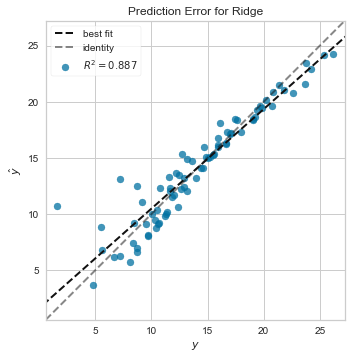

In [39]:
from yellowbrick.regressor import PredictionError
viz = PredictionError(ridge_model) 
viz.fit(X_train, y_train) # Fit the training data to the visualizer
viz.score(X_test, y_test) # Evaluate the model on the test data
viz.show()

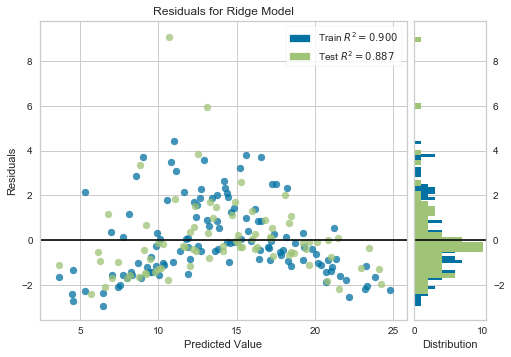

In [40]:
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(ridge_model)   
viz.fit(X_train, y_train) # Fit the training data to the visualizer
viz.score(X_test, y_test) # Evaluate the model on the test data
viz.show()                # Finalize and render the figure

**10-Cross Validation**

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuracies.mean()

0.8769877213330928

In [42]:
ridge_model.alpha

1.0

**11-Finding best alpha**

In [45]:
alpha_space = np.linspace(0.01, 20, 1000)

**12-Ridge Cross Validation**

In [46]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 3.00100100e-02, 5.00200200e-02, 7.00300300e-02,
       9.00400400e-02, 1.10050050e-01, 1.30060060e-01, 1.50070070e-01,
       1.70080080e-01, 1.90090090e-01, 2.10100100e-01, 2.30110110e-01,
       2.50120120e-01, 2.70130130e-01, 2.90140140e-01, 3.10150150e-01,
       3.30160160e-01, 3.50170170e-01, 3.70180180e-01, 3.90190190e-01,
       4.10200200e-01, 4.30210210e-0...
       1.96198098e+01, 1.96398198e+01, 1.96598298e+01, 1.96798398e+01,
       1.96998498e+01, 1.97198599e+01, 1.97398699e+01, 1.97598799e+01,
       1.97798899e+01, 1.97998999e+01, 1.98199099e+01, 1.98399199e+01,
       1.98599299e+01, 1.98799399e+01, 1.98999499e+01, 1.99199600e+01,
       1.99399700e+01, 1.99599800e+01, 1.99799900e+01, 2.00000000e+01]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [47]:
ridgecv.alpha_

3.191591591591591

**13-Finding Best alpha with yellowbrick**

In [49]:
from yellowbrick.regressor import ManualAlphaSelection

In [50]:
alpha_space = np.linspace(0.01, 20, 1000)

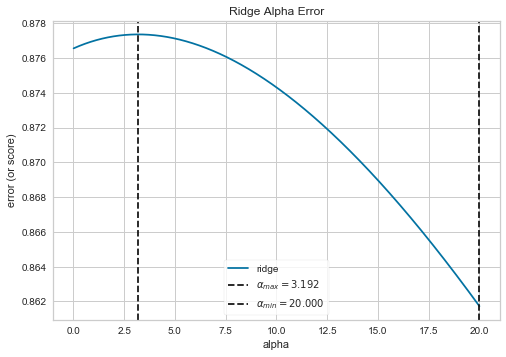

In [51]:
viz = ManualAlphaSelection(Ridge(), alphas = alpha_space, cv=10)
viz.fit(X_train, y_train)
viz.show()

**14-Training Ridge model again with best alpha**

In [52]:
ridge_model = Ridge(3.7).fit(X_train, y_train)

In [57]:
accuracies = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
print(f"Accuracy: {accuracies.mean():0.4f} (+/- {accuracies.std()*2:0.2f})")

Accuracy: 0.8773 (+/- 0.11)


**15-Feature importence of Ridge Model with Yellowbricks**

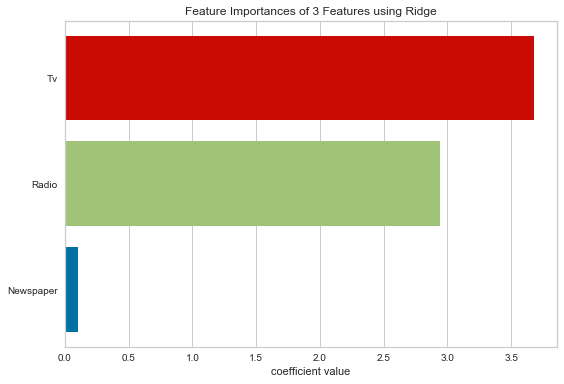

In [61]:
from yellowbrick.model_selection import FeatureImportances
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
viz.fit(X_train, y_train)
viz.show()